# Try to remove doublet from mouse multiome RNAseq data by Scrublet

In [1]:
%matplotlib inline
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=14)
plt.rcParams['pdf.fonttype'] = 42

In [3]:
os.chdir('/data/User/sunym/temp/')
os.getcwd()

'/data/User/sunym/temp'

## E145_2

### read data

In [4]:
RNA_data = pd.read_csv('/data/User/sunym/temp/E145_2.csv')
RNA_data = RNA_data.drop(columns=['Unnamed: 0'])
RNA_data = RNA_data.T
RNA_data

,0,1,2,3,4,5,6,7,8,9,...,55477,55478,55479,55480,55481,55482,55483,55484,55485,55486
AAACAGCCACGGTACT.1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
AAACAGCCATCAATCG.1,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
AAACAGCCATCACTTC.1,0,0,11,0,0,0,0,1,0,0,...,3,0,0,0,0,0,0,0,0,0
AAACAGCCATCCCTCA.1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
AAACAGCCATGCTCCC.1,0,0,5,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGGTCAGC.1,0,0,16,0,3,0,0,1,0,0,...,5,0,0,0,0,0,0,0,0,0
TTTGTTGGTAGCTGCG.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGGTTACGCAA.1,0,0,18,0,1,0,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0
TTTGTTGGTTGGCCGA.1,0,0,7,0,0,0,0,0,0,0,...,11,0,0,0,0,0,0,0,0,0


In [5]:
RNA_cell_list = RNA_data.index
RNA_cell_list

Index(['AAACAGCCACGGTACT.1', 'AAACAGCCATCAATCG.1', 'AAACAGCCATCACTTC.1',
       'AAACAGCCATCCCTCA.1', 'AAACAGCCATGCTCCC.1', 'AAACAGCCATTCAGCA.1',
       'AAACATGCACAATACT.1', 'AAACATGCACAGGATG.1', 'AAACATGCAGTTAGCC.1',
       'AAACCAACAATCATGT.1',
       ...
       'TTTGTGGCATAGCGGA.1', 'TTTGTGTTCAAGACTC.1', 'TTTGTGTTCAATCTCT.1',
       'TTTGTGTTCCGGGACT.1', 'TTTGTGTTCGACCTGA.1', 'TTTGTGTTCGGTCAGC.1',
       'TTTGTTGGTAGCTGCG.1', 'TTTGTTGGTTACGCAA.1', 'TTTGTTGGTTGGCCGA.1',
       'TTTGTTGGTTTGAGGC.1'],
      dtype='object', length=9668)

In [6]:
RNA_data = RNA_data.values

### Scrublet

In [7]:
scrub = scr.Scrublet(RNA_data, expected_doublet_rate=0.1)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.21
Detected doublet rate = 13.2%
Estimated detectable doublet fraction = 63.5%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 20.7%
Elapsed time: 14.8 seconds


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

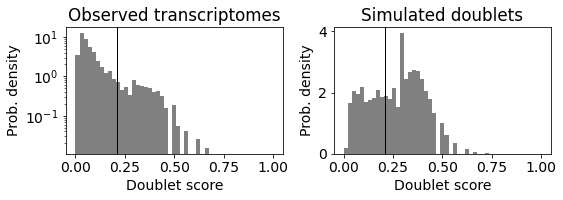

In [8]:
scrub.plot_histogram()

In [9]:
scrub.call_doublets(threshold=0.26)

Detected doublet rate = 10.8%
Estimated detectable doublet fraction = 55.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 19.6%


array([False, False, False, ..., False, False,  True])

(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

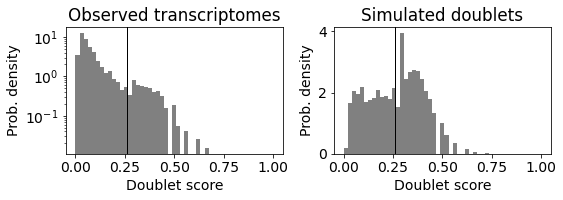

In [10]:
scrub.plot_histogram()

Running UMAP...


/data/User/sunym/env/Python_3.9.7/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Done.


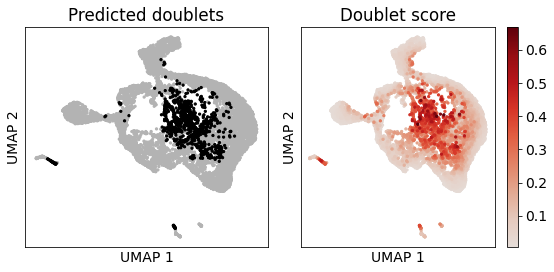

In [11]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

scrub.plot_embedding('UMAP', order_points=True);

# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);

In [12]:
a = np.array([RNA_cell_list,doublet_scores,predicted_doublets])
a = pd.DataFrame({'barcodes':a[0,:],'score':a[1,:],'prediction':a[2,:]})
a.to_csv('/data/User/sunym/project/Brain/res/step_55_fig_220907/E145_2_scrublet.csv', index=False,header=True)

## E155_3

### read data

In [13]:
RNA_data = pd.read_csv('/data/User/sunym/temp/E155_3.csv')
RNA_data = RNA_data.drop(columns=['Unnamed: 0'])
RNA_data = RNA_data.T
RNA_data

,0,1,2,3,4,5,6,7,8,9,...,55477,55478,55479,55480,55481,55482,55483,55484,55485,55486
AAACAGCCAAATGCCC.1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
AAACAGCCAATCCTAG.1,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
AAACAGCCAATTAGGA.1,0,0,1,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
AAACAGCCACGCAACT.1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
AAACAGCCAGCATTAT.1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCTTAGCGG.1,0,0,13,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
TTTGTGTTCTTTGACT.1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
TTTGTTGGTGCTTAGA.1,0,0,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
TTTGTTGGTGGTGAGA.1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [14]:
RNA_cell_list = RNA_data.index
RNA_cell_list

Index(['AAACAGCCAAATGCCC.1', 'AAACAGCCAATCCTAG.1', 'AAACAGCCAATTAGGA.1',
       'AAACAGCCACGCAACT.1', 'AAACAGCCAGCATTAT.1', 'AAACAGCCATAATTGC.1',
       'AAACATGCAACAGGAT.1', 'AAACATGCAGCTTAGC.1', 'AAACATGCAGTAGCCT.1',
       'AAACATGCAGTTGCGT.1',
       ...
       'TTTGTGTTCGCAAACT.1', 'TTTGTGTTCGCTTGCT.1', 'TTTGTGTTCGGTTTGG.1',
       'TTTGTGTTCGTGCTAG.1', 'TTTGTGTTCTTACTCG.1', 'TTTGTGTTCTTAGCGG.1',
       'TTTGTGTTCTTTGACT.1', 'TTTGTTGGTGCTTAGA.1', 'TTTGTTGGTGGTGAGA.1',
       'TTTGTTGGTTTAGTCC.1'],
      dtype='object', length=13096)

In [15]:
RNA_data = RNA_data.values

### Scrublet

In [16]:
scrub = scr.Scrublet(RNA_data, expected_doublet_rate=0.1)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.12
Detected doublet rate = 27.8%
Estimated detectable doublet fraction = 84.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 33.0%
Elapsed time: 22.9 seconds


(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

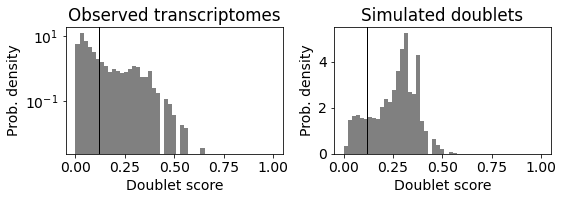

In [17]:
scrub.plot_histogram()

In [18]:
scrub.call_doublets(threshold=0.19)

Detected doublet rate = 18.9%
Estimated detectable doublet fraction = 72.8%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 25.9%


array([False, False, False, ..., False, False,  True])

(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

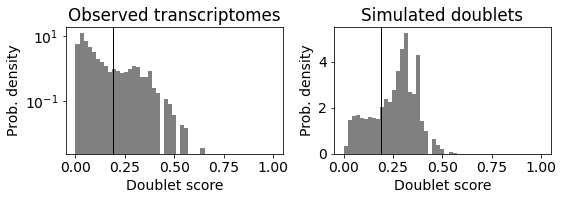

In [19]:
scrub.plot_histogram()

Running UMAP...
Done.


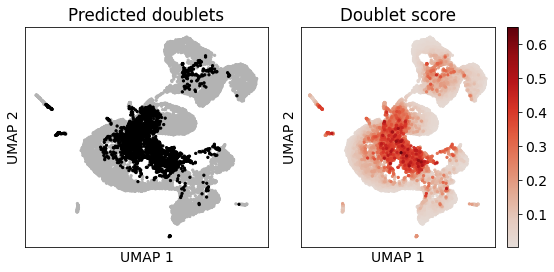

In [20]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

scrub.plot_embedding('UMAP', order_points=True);

# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);

In [21]:
a = np.array([RNA_cell_list,doublet_scores,predicted_doublets])
a = pd.DataFrame({'barcodes':a[0,:],'score':a[1,:],'prediction':a[2,:]})
a.to_csv('/data/User/sunym/project/Brain/res/step_55_fig_220907/E155_3_scrublet.csv', index=False,header=True)

## E165_2

### read data

In [22]:
RNA_data = pd.read_csv('/data/User/sunym/temp/E165_2.csv')
RNA_data = RNA_data.drop(columns=['Unnamed: 0'])
RNA_data = RNA_data.T
RNA_data

,0,1,2,3,4,5,6,7,8,9,...,55477,55478,55479,55480,55481,55482,55483,55484,55485,55486
AAACAGCCAAATTCGT.1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
AAACAGCCAAGGTAAC.1,0,0,4,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
AAACAGCCACATTAAC.1,0,0,2,0,0,0,0,0,0,0,...,7,1,0,0,0,0,0,0,0,0
AAACAGCCAGCATTAT.1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
AAACAGCCATGAGCAG.1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCTACCTAT.1,0,0,3,0,1,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
TTTGTGTTCTCCATGC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGGTGATGAAA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGGTGGTTCTT.1,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
RNA_cell_list = RNA_data.index
RNA_cell_list

Index(['AAACAGCCAAATTCGT.1', 'AAACAGCCAAGGTAAC.1', 'AAACAGCCACATTAAC.1',
       'AAACAGCCAGCATTAT.1', 'AAACAGCCATGAGCAG.1', 'AAACATGCAAGCTTTG.1',
       'AAACATGCAAGTTATC.1', 'AAACATGCACAATACT.1', 'AAACATGCATAAACCT.1',
       'AAACCAACAAGCCAGA.1',
       ...
       'TTTGTGTTCCGTAAAC.1', 'TTTGTGTTCCTAGTAA.1', 'TTTGTGTTCCTGGTGA.1',
       'TTTGTGTTCGCGACAC.1', 'TTTGTGTTCGTTTCCA.1', 'TTTGTGTTCTACCTAT.1',
       'TTTGTGTTCTCCATGC.1', 'TTTGTTGGTGATGAAA.1', 'TTTGTTGGTGGTTCTT.1',
       'TTTGTTGGTTTACGTC.1'],
      dtype='object', length=10322)

In [24]:
RNA_data = RNA_data.values

### Scrublet

In [25]:
scrub = scr.Scrublet(RNA_data, expected_doublet_rate=0.08)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.07
Detected doublet rate = 46.2%
Estimated detectable doublet fraction = 90.6%
Overall doublet rate:
	Expected   = 8.0%
	Estimated  = 51.0%
Elapsed time: 19.1 seconds


(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

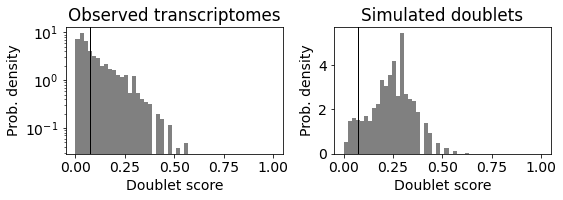

In [26]:
scrub.plot_histogram()

In [27]:
scrub.call_doublets(threshold=0.14)

Detected doublet rate = 27.0%
Estimated detectable doublet fraction = 80.0%
Overall doublet rate:
	Expected   = 8.0%
	Estimated  = 33.7%


array([False, False,  True, ..., False, False, False])

(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

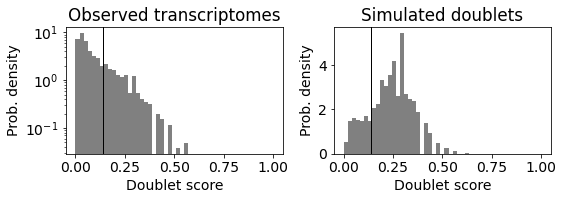

In [28]:
scrub.plot_histogram()

Running UMAP...
Done.


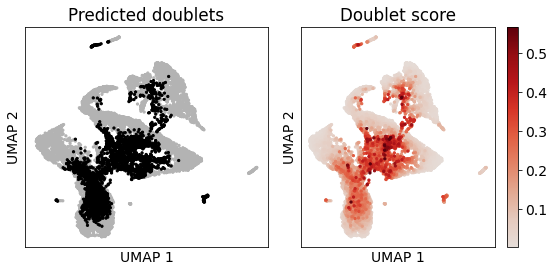

In [29]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

scrub.plot_embedding('UMAP', order_points=True);

# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);

In [30]:
a = np.array([RNA_cell_list,doublet_scores,predicted_doublets])
a = pd.DataFrame({'barcodes':a[0,:],'score':a[1,:],'prediction':a[2,:]})
a.to_csv('/data/User/sunym/project/Brain/res/step_55_fig_220907/E165_2_scrublet.csv', index=False,header=True)